# Lab 4: Quadrature

Today we'll turn from computing derivatives numerically to performing integration numerically. For historical reasons, numerical integration is also called *Quadrature*. Just like last time, we're going to continue our theme of turing calculus into arithmatic.

All numerical quadrature algorithms that we will consider follow a simple base form:

$$ \int_a^b f(x) dx \simeq \sum_{i=1}^N f(x_i) w_i $$

where $f(x_i)$ is the function in question evaluated at point $x_i$, and $w_i$ is an appropriately chosen  *weight* at point $i$. Staring at that equation for awhile, it becomes quite obvious that evaluating the sum on the right hand side is pretty easy. The only mysteries are in chosing the weights $w_i$ and the points $x_i$ to evaluate the function at.

In this lab, we're going to learn three different quadrature methods: the extended Trapezoidal rule, the extended Simpson's rule, and Gauss-Legendre (or just "regular" Gaussian) methods. It's worth noting that these are just three of many, many common (and even more historical) numerical integration methods. All of them are fairly similar, though there are such a plethora of them because *no one method works best for all cases*. This is, of course, the theme we keep coming back to this semester. You're going to need to choose which method works best for your particular problem. 

Let's make a plot to remind ourselves of what integration really is: the area under the curve. First, let's choose a function. I've arbitrarily chosen $f(x) = 3 x^2 - 6 x^3 + 3.2 x^4$ because it looks cool and was easy to type.

In [2]:
import numpy as np
a = 0.3
b = 1.1
x = np.linspace(a,b,100)
f = 3*x**2 -6*x**3 +3.2*x**4

The usual matplotlib setup. Note that I've added `plt.rcParams['figure.figsize'] = (10.0, 8.0)`. This makes the plots appear bigger, which is always a good thing. 

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.style.use('ggplot')

Now we make the plot. Don't worry about anything you don't understand in the code below; I just want to make figures that you can in principle make yourself later, rather than just cutting and pasting a finished graph here with no understanding of where it came from.

(0.2, 1.2)

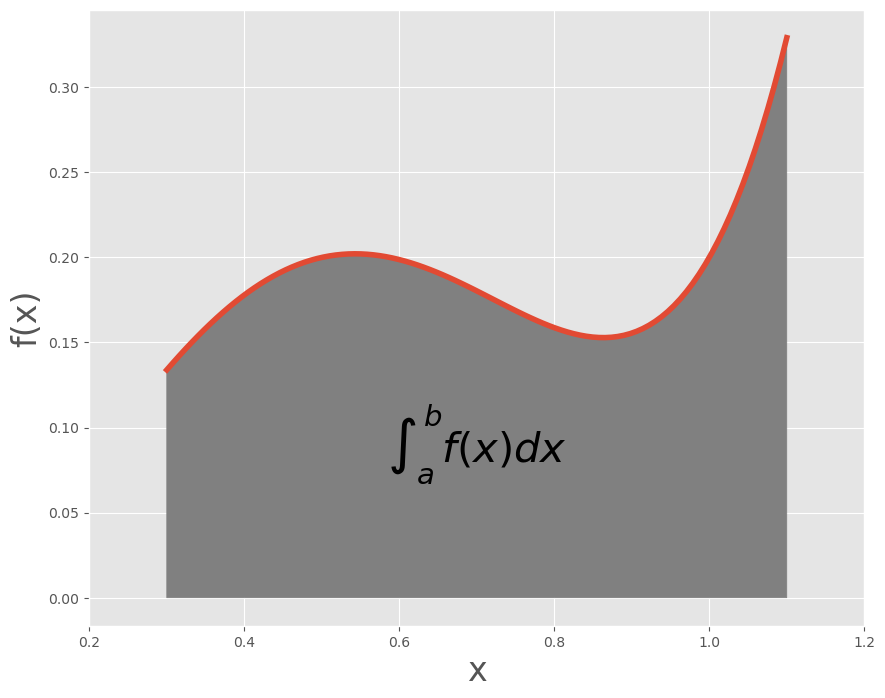

In [4]:
fig,ax = plt.subplots()
verts = [(a, 0)] + list(zip(x, f)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.5', edgecolor='0.5')
ax.add_patch(poly)
plt.plot(x,f,linewidth=4)
plt.text((b-a)/2.+a,0.08,r"$\int_a^b f(x) dx$",fontsize=30,horizontalalignment='center')

plt.xlabel("x",fontsize=24)
plt.ylabel("f(x)",fontsize=24)
plt.xlim(0.2,1.2)

Let's revisit this plot, but add a set of lines representing the points $x_i$ where we're going to evaluate the function to approximate the shaded area:

(0.2, 1.2)

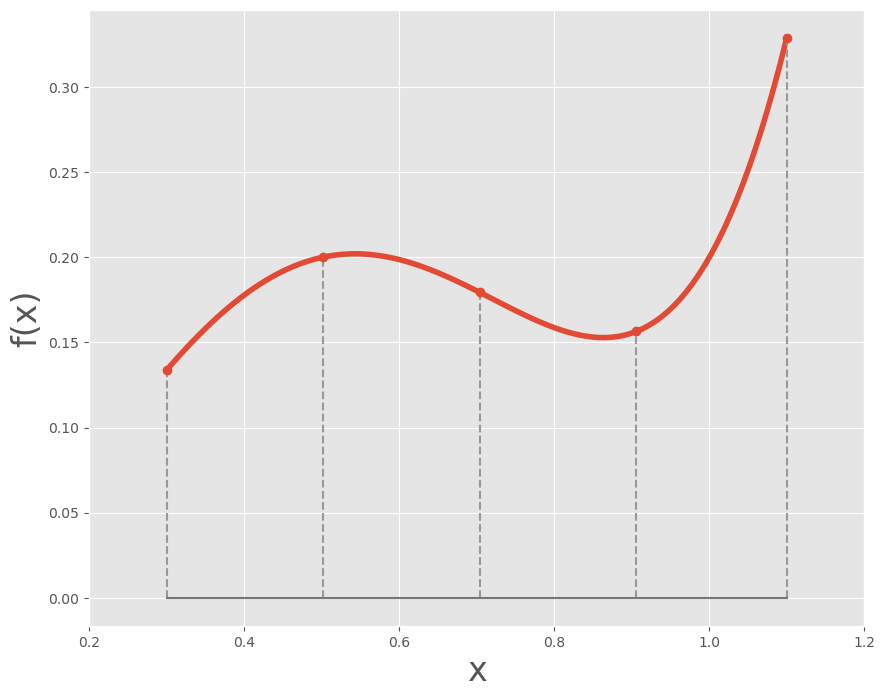

In [5]:
plt.figure()
plt.plot(x,f,linewidth=4)
m,s,b = plt.stem(list(x[::25])+[x[-1],],list(f[::25])+[f[-1],])

s.set_colors('0.6')
s.set_linestyles('--')

plt.xlabel("x",fontsize=24)
plt.ylabel("f(x)",fontsize=24)
plt.xlim(0.2,1.2)

Clearly, we need a way of constructing tops to those intervals such that they closely approximate $f(x)$ but also have areas we can calculate trivially. One of the simplest ways to do this is to construct trapezoids by simply drawing straight lines between the selected points $f(x_i)$:

(0.2, 1.2)

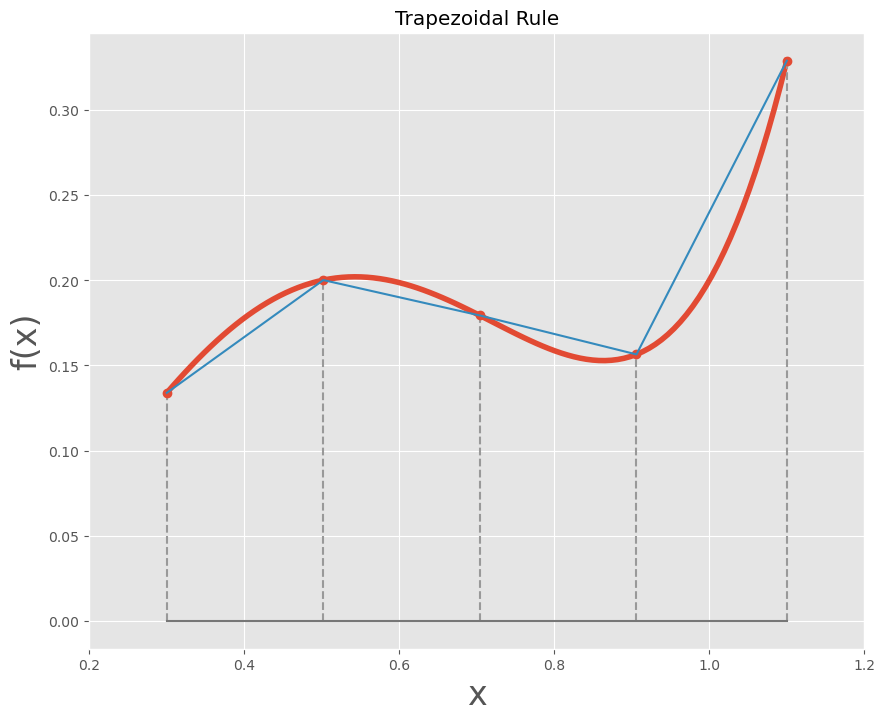

In [6]:
plt.figure()
plt.plot(x,f,linewidth=4)
m,s,b = plt.stem(list(x[::25])+[x[-1],],list(f[::25])+[f[-1],])
plt.plot(list(x[::25])+[x[-1],],list(f[::25])+[f[-1],])

s.set_colors('0.6')
s.set_linestyles('--')

plt.xlabel("x",fontsize=24)
plt.ylabel("f(x)",fontsize=24)
plt.title("Trapezoidal Rule")
plt.xlim(0.2,1.2)

This is called the **Trapezoidal rule** for numerical integration. Let's dig in to it a bit to understand how it works, as it is the simplest method. 

## Trapezoidal Rule

For our first two methods, we will consider *evenly spaced* points $x_i$ at which we evaluate our function. For both, we *include* the end points $[a,b]$, so the N points are chosen such that

$$h = \frac{b-a}{N-1}$$

and 

$$\ x_i = a + i h;\ i = 0 \ldots N-1$$

First, we consider the basic trapezoidal rule, in which we use only two points to compute the integral, $x_1 = a$ and $x_2 = b$:

(0.2, 1.2)

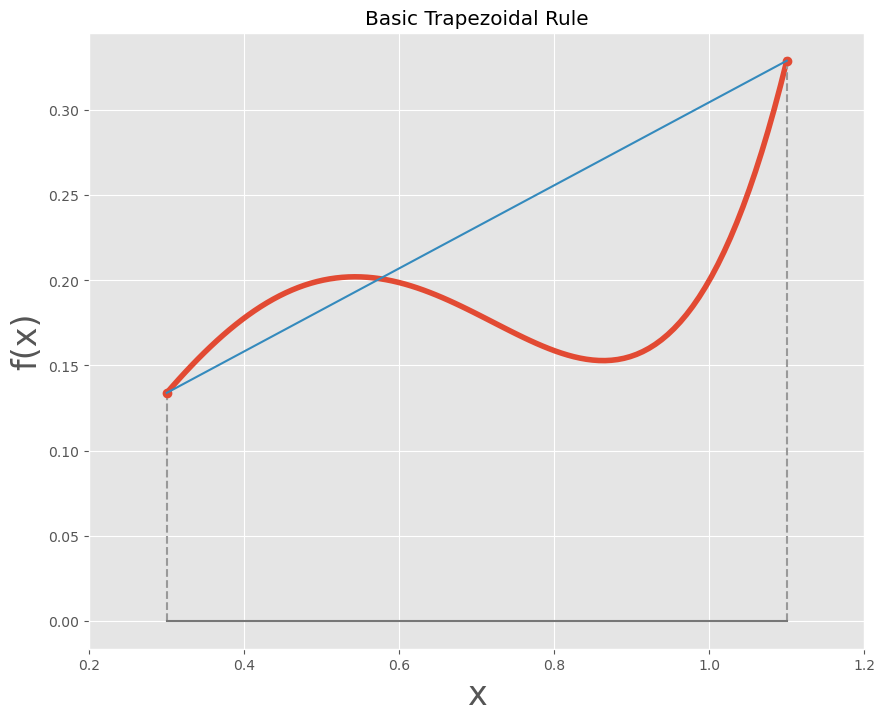

In [7]:
plt.figure()
plt.plot(x,f,linewidth=4)
m,s,b = plt.stem([x[0],x[-1]],[f[0],f[-1]])
plt.plot([x[0],x[-1]],[f[0],f[-1]])

s.set_colors('0.6')
s.set_linestyles('--')

plt.xlabel("x",fontsize=24)
plt.ylabel("f(x)",fontsize=24)
plt.title("Basic Trapezoidal Rule")
plt.xlim(0.2,1.2)

Now, we calculate the area under the blue curve. There are many ways to see this, but the simplest is that the area of the trapezoid is equal to the area of the rectangle with height equal to the average of the two sides: $A = H (f(b) + f(a))/2$. Since there's only one trapezoid, we simply have:

$$\int_a^b f(x) dx = h \left(\frac{1}{2} f(a) + \frac{1}{2} f(b)\right) $$

Obviously, this is no the greatest approximation. But remember the following fact about integrals:

$$ \int_a^c f(x) dx = \int_a^b f(x) dx + \int_b^c f(x) dx, $$

so long as $a < b < c$. This means we can *extend* the trapezoidal rule to more than two points by simply summing up a bunch of smaller intervals:

$$\int_a^b f(x) dx = \int_{x_0}^{x_1} f(x) dx + \int_{x_1}^{x_2} f(x) dx = h \left(\frac{1}{2} f(x_0) + \frac{1}{2} f(x_1)\right) + h \left(\frac{1}{2} f(x_1) + \frac{1}{2} f(x_2)\right),$$

remembering that $x_0 = a$ and $x_2 = b$, given our definition of $x_i$ above. Now, looking closely, we see that the term containing $f(x_1)$ appears twice. So, we can simplify to 

$$\int_a^b f(x) dx =  h \left(\frac{1}{2} f(x_0) + f(x_1) + \frac{1}{2} f(x_2)\right),$$

This pattern gives us the *weights* for the trapezoidal rule:

$$ w_i = \left\{\frac{h}{2}, h, \ldots, h,\frac{h}{2} \right\}. $$

Now we have in hand both our choice for $x_i$ and $w_i$, and so we now know how to use the trapezoidal rule to compute numerical approximations to integrals. Below is some heavily commented code to compute the trapezoidal rule. It introduces a number of new numpy tricks that will make your life much easier and faster.

In [8]:
def qtrap(f,a,b,N):
    """qtrap evaluates the trapezoidal rule approximation to the integral of f(x) on the interval [a, b] using N points.
    
    inputs
    ------
    f: function that can operate on numpy arrays
    a: float representing the lower limit of the integral
    b: float representing the upper limit of the integral
    N: int representing the number of samples
    
    """
    h = (b-a)/(N-1) # first we define h.
    x = a+np.arange(N)*h # np.arange(N) returns a np array; we can multiply it and add numbers to each element in it
    
    w = h*np.ones(N) # this is the same trick as for x; multipying a bunch of ones from np.ones(N) by h
    # since w is 1 on all interior points, and 1/2 on the first and last, we can just do
    w[0] *= 0.5
    w[-1] *= 0.5

        
    data = f(x) # f is a function that we "pass" into the qtrap; here we have it evaluate at every point in x, 
                # storing the results in a new numpy array I called "data"
    
    # this is the actual integral: data*w is a new numpy array 
    # of the same length as data and w, which I call "integrand"
    integrand = data*w
    
    # numpy arrays can sum themeselves by calling their .sum() method:
    integral = integrand.sum()
    
    return integral

In [9]:
qtrap(np.sin,0,np.pi,10000)

1.9999999835473687

## Simpson's rule

The next method we will consider is Simpson's rule. Again, this uses the same evenly spaced $x_i$, including the endpoints $a$ and $b$. However, rather than fitting a straight line between the points, it fits a quadratic:

$$ f(x) \simeq \alpha x^2 + \beta x + \gamma.$$

The quadratic can be exactly integrated, of course,

$$\int_a^b \alpha x^2 + \beta x + \gamma dx = \frac{\alpha x^3}{3} + \frac{\beta x^2}{2} + \gamma x\bigg|_{a}^{b}.$$

We need now to relate $\alpha, \beta, \gamma$ to the values of the function we want to integrate. To do so, we simply choose $a = -1$ and $b=1$, to see that 

$$\int_a^b \alpha x^2 + \beta x + \gamma dx = \frac{2\alpha}{3} + 2 \gamma.$$

Then we add in the fact that $f(-1) = \alpha - \beta + \gamma$, $f(0) = \gamma$, and $f(1) = \alpha + \beta + \gamma$. Doing some algebra we arrive at 

$$
\begin{align}
\alpha  &= \frac{f(1) + f(-1)}{2} - f(0)\\
\beta &= \frac{f(1) - f(-1)}{2}\\
\gamma& = f(0)
\end{align}
$$

So, 

$$\int_a^b \alpha x^2 + \beta x + \gamma dx = \frac{f(-1)}{3} + \frac{4 f(0)}{3} + \frac{f(1)}{3}.$$

There is a very important difference from the trapezoidal rule: **this method requires 3 function evaluations per interval instead of two**. Otherwise, it's very similar, and we can string together many of these, in which the internal end points (the ones represending $f(1)$) are doubled, and we end up with weights

$$w_i = \left\{\frac{h}{3}, \frac{4h}{3}, \frac{2h}{3}, \frac{4h}{3},\ldots,\frac{2h}{3}, \frac{4h}{3}, \frac{h}{3} \right\}.$$

Please note that **N, the number of points, must be odd** for Simpson's rule to work. 

You should try to derive this (outside of class) on your own from the sketch above. The only tricky part is moving from limits of $[-1,1]$ to $[a,b]$. 

For now, modify the `qtrap` rule above to implement Simpson's rule instead. Make sure to test N for oddness using an `if` statement and if N is even, have your program "raise an error". Here's an example of how to do that. Python has lots of these error classes built in, but we can just use `ValueError`, which you use when someone gives your program a value of a variable or function that doesn't work:

In [10]:
x = 2

if x == 2:
    raise ValueError("X is two, and I hate that.")

ValueError: X is two, and I hate that.

In [1]:
def qsimp(f,a,b,N):
    """qsimp uses Simpson's rule to evaluate an approximation to the integral of f(x) on the interval [a, b] using N points.
    
    inputs
    ------
    f: function that can operate on numpy arrays
    a: float representing the lower limit of the integral
    b: float representing the upper limit of the integral
    N: int representing the number of samples
    
    """
    if N%2!=1 and N>=3:
        raise ValueError("Simpson's rule requires that N, the number of points be odd and at least 3.")
    h = (b-a)/(N-1) # first we define the width between each x_i
    x = a+np.arange(N)*h # np.arange(N) returns a np array; we can multiply it and add numbers to each element in it
    
    w = np.zeros(N) #initializing a weight array

    for i in range(len(x)):
        if i%2==1:
            w[i] = h *4/3 # i is even
        else:
            w[i] = h *2/3 # i is odd
    w[0] = w[-1] = h/3 # fixing end points
        
    data = f(x) # f is a function that we "pass" into the qtrap; here we have it evaluate at every point in x, 
                # storing the results in a new numpy array I called "data"
    
    # this is the actual integral: data*w is a new numpy array 
    # of the same length as data and w, which I call "integrand"
    integrand = data*w
    
    # numpy arrays can sum themeselves by calling their .sum() method:
    integral = integrand.sum()

    return integral

In [11]:
print(qsimp(np.sin,0,np.pi,10001)) # testing

2.0


## Gaussian quadrature

Gaussian quadrature breaks with the previous methods by *not* using evenly spaced points $x_i$. Instead, Gauss had the tremendous insight that if you are free to choose *both* the $x_i$ *and* $w_i$, you have much more freedom, and that freedom can turn into much higher accuracy for far fewer $N$...sometimes, but not always!

One particularly useful feature of Gaussian quadrature, besides the fact that for some functions it converges toward the right answer far quicker (meaning with far fewer function evaulation points), is that it *doesn't include the end points*. Why is that useful? There are a LOT of functions we want to integrate in physics that are singular (e.g. $ = 0/0$) on their endpoints. Rules that use the endpoints *simply can't integrate these functions*.  

The basic form of Gaussian quadrature is the same as before:

$$ \int_a^b f(x) dx \simeq \sum_{i=1}^N f(x_i) w_i, $$

but now we choose $x_i$ and $w_i$ such that if $f(x) = W(x) g(x)$ and $g(x)$ were a $2N - 1$ degree polynomial, the integration would be exact. Note something amazing here: we're only going to evaluate $f(x_i)$ at $N$ points, but we could get *exact* answers for a polynomial of much higher order! 

There are two important things for Gaussian integration, first, the method uses the interval $[-1,1]$ internally, so we have to *scale* our variable $x$ to a new variable $y$ so that the method can compute

$$
\int_{-1}^1 f(y) dy \simeq \sum_{i=1}^N f(y_i) w_i', 
$$
where $w_i'$ is **not** the derivative, it's just showing that the weights used are different in the method than the weights we need for our function on $[a,b]$.
There are several ways to do this, depending on if you want to integrate to $\infty$ or from $-\infty$ or something. In this class, we'll concentrate on $a,b$ finite, and use just one simple mapping of $[-1,1] \to [a, b]$:

$$
\begin{align}
x_i &= \frac{b+a}{2} + \frac{b -a}{2} y_i\\
w_i &= \frac{b-a}{2} w_i'
\end{align}
$$

Finally, we need to actually chose the points. For normal Gaussian integration, the points $y_i$ are chosen to be the zeros (or "roots") of the Legendre polynomial $P_N$ of order $N$, the number of points. The condition $P_N(y_i) = 0$ gives $y_i$. The weights are given by 

$$
w_i' = \frac{2}{(1-y_i^2)(d P_N(y_i)/dx)^2}.
$$

This is pretty complicated, and evaluating $P_N$ is beyond the scope of this class. So, for once, I will tell you to simply use the `numpy` function  `np.polynomial.legendre.leggauss` to get the weights and the points. 

Here is a simple function to do Gaussian integration.

In [12]:
def gauss(f,a,b,N):
    y,wprime = np.polynomial.legendre.leggauss(N)
    x = 0.5*(y + 1)*(b - a) + a
    w = wprime* 0.5*(b-a)
    return (f(x)*w).sum()

## Testing it all

Now, use your functions `qtrap`, `qsimp`, and `gauss` to construct approximations to the integral of $f(x) = e^{-x}$ from 0 to 1. Run each function with values of N ranging from 5 to 500. Store the relative error with the analytic solution (which you should compute by hand first) in numpy arrays, and then plot them on a log-log plot. 

What do you see about the error in each? Given that it takes longer and longer to run as we increase N, which should you use? Can you explain the error behavior of the Gaussian method in terms of truncation and round off error.


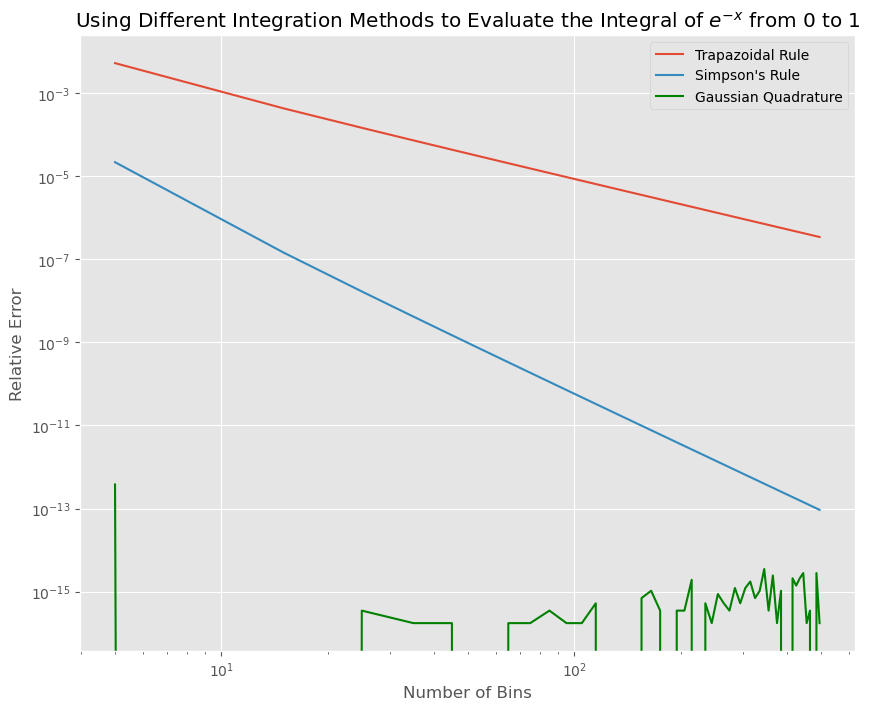

In [13]:
# use this as your f instead of writing the equation in the function as we did earlier 
# old version: qtrap(np.sin,0,np.pi,10000)
# this version: qtrap(f,0,np.pi,10000)
f = lambda x : np.exp(-x)
a = 0
b = 1
answ = 1 - np.exp(-1)

N_array = np.arange(5, 501,10)
#initializing
trap_ls = np.zeros(len(N_array))
simp_ls = np.zeros(len(N_array))
gauss_ls = np.zeros(len(N_array))


for i in range(len(N_array)):
    trap_ls[i] = abs(qtrap(f,a,b,N_array[i]) - answ) / answ
    simp_ls[i] = abs(qsimp(f,a,b,N_array[i]) - answ) / answ
    gauss_ls[i] = abs(gauss(f,a,b,N_array[i]) - answ) / answ


plt.loglog(N_array, trap_ls, label = "Trapazoidal Rule")
plt.loglog(N_array, simp_ls, label = "Simpson's Rule")
plt.loglog(N_array, gauss_ls, label = "Gaussian Quadrature", color = "green")
plt.xlabel("Number of Bins")
plt.ylabel("Relative Error")
plt.title("Using Different Integration Methods to Evaluate the Integral of $e^{-x}$ from 0 to 1")
plt.legend()
plt.show()